## Working Directory


In [1]:
%pwd

'C:\\Users\\javeg'

# Project No. 1 - MNIST
### Author: Juan Antonio Vega Fernandez
#### Fecha: 10 de Febrero, 2022

Description: lkjsdfkj asdlkjflsd lksjadflkjfds lkjsfkljsadf

## 1. Read Data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

### Structure of the data

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist["data"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
mnist.data.shape

(70000, 784)

In [7]:
mnist.target.shape

(70000,)

In [8]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

## 2. Data preprocessing
Let's separate Data from Target

In [9]:
X, y = mnist["data"], mnist["target"]

In [10]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

In [12]:
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Difficult to visualize, let's improve the visualization:

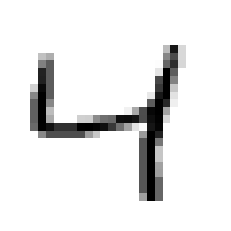

In [13]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

un_numero = X[2]
any_digit_image = un_numero.reshape(28,28)
plt.imshow(any_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

And what does the target say?

In [64]:
y[2]

'4'

In [15]:
y.shape


(70000,)

Now let's create the training set and the test set

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
y_test.shape

(10000,)

In [18]:
y_train.shape

(60000,)

## 3. Model Creation

In [19]:
import numpy as np

# Delete the comment sign "#" in the next two lines to use SGDClassifier

from sklearn.linear_model import SGDClassifier
my_model1 = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

from sklearn.naive_bayes import GaussianNB
my_model2 = GaussianNB()

## 4. Adjust model with Historic Data
## This is the TRAINING Step

In [20]:
my_model1.fit(X_train, y_train)
my_model2.fit(X_train, y_train)

GaussianNB()

## 5. Prediction for New Data
### This is the TESTING Step

For one number, in this case any_digit

In [65]:
my_model1.predict([un_numero])

array(['4'], dtype='<U1')

For all the test data

In [22]:
X_test.shape

(10000, 784)

In [23]:
y_predict = my_model1.predict(X_test)

Let's se the first 7 digits for testing:

In [66]:
y_test[:7]

0    0
1    1
2    2
3    2
4    3
5    2
6    8
Name: label, dtype: int64

Now the predictions:

In [67]:
y_predict[:7]

array(['7', '2', '1', '0', '4', '1', '4'], dtype='<U1')

## 6. Visualization of Results
How good we did it?

In [68]:
from sklearn.model_selection import cross_val_score
cross_val_score(my_model1, X_train, y_train, cv=3, scoring="accuracy")

array([0.7238 , 0.74735, 0.7489 ])

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 947,    0,    4,    9,    1,    3,   10,    2,    2,    2],
       [   0, 1069,   32,    6,    0,    4,   10,    2,   10,    2],
       [   7,    0,  923,   28,   10,    1,   17,   11,   31,    4],
       [   3,    0,   18,  924,    3,   26,    3,   14,   10,    9],
       [   3,    0,    3,    5,  919,    0,   16,    4,    4,   28],
       [  14,    2,    6,   72,   18,  698,   28,   10,   22,   22],
       [   7,    2,    6,    6,    3,    9,  924,    0,    1,    0],
       [   5,    4,   24,    6,    6,    2,    0,  955,    3,   23],
       [  15,    7,   28,   73,   21,   43,   34,   24,  715,   14],
       [   9,    4,    2,   17,   60,    9,    1,   94,    7,  806]],
      dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.888

### Let's test the image we just did in Paint

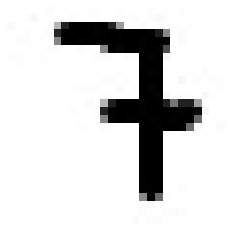

In [69]:
%matplotlib inline

from PIL import Image
jpgfile = Image.open("siete.jpg")

import matplotlib
import matplotlib.pyplot as plt
plt.imshow(jpgfile, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [70]:
mynumber = np.array(jpgfile)

In [71]:
mynumber.shape

(28, 28, 3)

In [74]:
my_model1.predict([mynumber[:,:,0].reshape(784)])

array(['5'], dtype='<U1')

In [73]:
my_model2.predict([mynumber[:,:,1].reshape(784)])

array(['2'], dtype='<U1')

# Fashion MNIST

### 1. Read the Fashion MNIST Data

In [34]:
import pandas as pd
train_df = pd.read_csv("H:\\__ML21\\Datasets\\fashion-mnist\\fashion-mnist_train.csv")
test_df = pd.read_csv("H:\\__ML21\\Datasets\\fashion-mnist\\fashion-mnist_test.csv")

In [35]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [38]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


### 2. Data Preprocessing

In [39]:
y_train = train_df.pop("label")
y_test = test_df.pop("label")

In [40]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [41]:
y_train.shape

(60000,)

In [42]:
train_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
import numpy as np
X_train = np.array(train_df)
X_test= np.array(test_df)

In [44]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
X_train.shape

(60000, 784)

In [46]:
one_target = y_train[123]
one_image = X_train[123]


In [47]:
one_target

6

In [48]:
one_image

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,   0,
         0, 222, 139,  27, 255, 144,   0,   0,   0,   2,   3,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  69, 164, 114, 235, 139, 111, 106,  80,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
        19, 137, 207, 162, 185, 102, 200, 185, 140, 148, 211, 152, 212,
       127,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 123, 167, 140, 158,   0, 155, 174, 140,  95, 171,  52, 121,
         0, 100, 126,  57,  48,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 142,   0,   6, 154,   6, 252, 129, 119, 235, 144,
        68, 255,  97, 160, 167,  40, 133,  34,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  44, 182, 133, 189, 255,  48, 219,  7

### 3. Model Creation

In [49]:
import numpy as np

from sklearn.linear_model import SGDClassifier
fashion_model1 = SGDClassifier(max_iter=10, tol=-np.infty, random_state=42)

from sklearn.naive_bayes import GaussianNB
fashion_model2 = GaussianNB()

### 4. Training models

In [50]:
fashion_model1.fit(X_train, y_train)
fashion_model2.fit(X_train, y_train)

GaussianNB()

### 5. Prediction of new data

In [51]:
fashion_model2.predict([one_image])

array([4], dtype=int64)

In [52]:
fashion_model1.predict([one_image])

array([6], dtype=int64)

In [53]:
fy_predict1 = fashion_model1.predict(X_test)
fy_predict2 = fashion_model2.predict(X_test)

In [54]:
fy_predict1[:10]

array([6, 1, 2, 2, 4, 6, 8, 6, 5, 0], dtype=int64)

In [55]:
fy_predict2[:10]

array([0, 1, 2, 2, 3, 6, 8, 4, 5, 0], dtype=int64)

In [56]:
y_test[:10]

0    0
1    1
2    2
3    2
4    3
5    2
6    8
7    6
8    5
9    0
Name: label, dtype: int64

### 6. Visualization of Results

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(fashion_model1, X_train, y_train, cv=3, scoring="accuracy")

array([0.78745, 0.8053 , 0.78535])

In [58]:
from sklearn.model_selection import cross_val_score
cross_val_score(fashion_model2, X_train, y_train, cv=3, scoring="accuracy")

array([0.59945, 0.5946 , 0.58915])

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, fy_predict1)

0.8127

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, fy_predict2)

0.5914

In [61]:
from sklearn.metrics import precision_score
precision_score(y_test, fy_predict1, average='macro')

0.8255622970184291

In [62]:
from sklearn.metrics import recall_score
recall_score(y_test, fy_predict1, average='micro')

0.8127

In [63]:
from sklearn.metrics import f1_score
f1_score(y_test, fy_predict1, average = 'weighted')

0.814360804510589